# Jonathan Bunch
# 25 April, 2021
# Project Milestone 2

This data set contains information about closed hazardous waste facilities in Florida. The data set is already relatively well cleaned and formatted, so it should only need a few basic transformations.

In [2]:
# Import libraries.
import pandas as pd
import matplotlib.pyplot as plt

# Import the data.
haz_raw = pd.read_csv("Closed_Hazardous_Waste_Facilities.csv")

# View a sample of the data.
haz_raw.head()

,X,Y,HANDLER_ID,SITE_ID,NAME,CITY,ZIP5,ZIP4,OFFICE,NOTIFIED,FAC_INS_TYPE,LAST_INSP_DATE,OBJECTID,ADDRESS,CC2_COUNTY_ID,DOCUMENTS,COUNTY_NAME
0,-82.341709,29.705980,FLD981479280,40304,Port O Port Inc,Gainesville,32653,2111.0,NED,1986/08/15 00:00:00+00,CLO-SV,2020/03/24 14:17:13+00,1,1506 NW 55th Pl,1,https://prodenv.dep.state.fl.us/DepNexus/publi...,Alachua
1,-82.517252,29.802618,FLD984215707,49578,BP Oil Co #24488,Alachua,29465,NaN,NED,1991/12/15 00:00:00+00,NaN,1970/01/01 00:00:00+00,2,Rt 1 Box 229 I-75 Us Hwy 441,1,https://prodenv.dep.state.fl.us/DepNexus/publi...,Alachua
2,-82.320162,29.679918,FLD984216754,46124,Blackwelder Radiator Service,Gainesville,32609,6026.0,NED,1991/08/15 00:00:00+00,NaN,1970/01/01 00:00:00+00,3,3020 N Main St,1,https://prodenv.dep.state.fl.us/DepNexus/publi...,Alachua
3,-82.378834,29.602923,FLD981749724,48483,Boone Waste Industries Inc,Gainesville,32608,4929.0,NED,1986/11/15 00:00:00+00,-,1996/01/25 00:00:00+00,4,5002 SW 41st Blvd,1,https://prodenv.dep.state.fl.us/DepNexus/publi...,Alachua
4,-82.404448,29.671950,FLD981749922,48488,Cameron Cars,Gainesville,30501,1532.0,NED,1986/10/15 00:00:00+00,NaN,1970/01/01 00:00:00+00,5,1758 Dawsonville Hwy,1,https://prodenv.dep.state.fl.us/DepNexus/publi...,Alachua


Now that we can see all the columns, I can start removing some irrelevant variables.

In [3]:
haz_keep_list = ['NAME', 'CITY', 'CC2_COUNTY_ID', 'COUNTY_NAME']
haz_sub_1 = haz_raw[haz_keep_list]
haz_sub_1.head()

,NAME,CITY,CC2_COUNTY_ID,COUNTY_NAME
0,Port O Port Inc,Gainesville,1,Alachua
1,BP Oil Co #24488,Alachua,1,Alachua
2,Blackwelder Radiator Service,Gainesville,1,Alachua
3,Boone Waste Industries Inc,Gainesville,1,Alachua
4,Cameron Cars,Gainesville,1,Alachua


The all capitalized column names are a little inconvenient, so I will rename them.

In [4]:
haz_new_names = {'NAME': 'name', 'CITY': 'city', 'CC2_COUNTY_ID': 'county_id', 'COUNTY_NAME': 'county'}
haz_sub_2 = haz_sub_1.rename(columns=haz_new_names)
haz_sub_2.head()

,name,city,county_id,county
0,Port O Port Inc,Gainesville,1,Alachua
1,BP Oil Co #24488,Alachua,1,Alachua
2,Blackwelder Radiator Service,Gainesville,1,Alachua
3,Boone Waste Industries Inc,Gainesville,1,Alachua
4,Cameron Cars,Gainesville,1,Alachua


Next I will check for missing values.

In [5]:
haz_sub_2.isna().sum()

name         0
city         0
county_id    0
county       0
dtype: int64

There are no missing values, so lets check for outliers. I will try a histogram first.

len(haz_sub_2.county_id.unique()) = 67


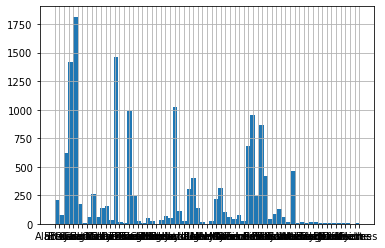

In [6]:
# I will use a count of unique values as the bin size so we can see the count for each individual county.
print(f"{len(haz_sub_2.county_id.unique()) = }")
haz_sub_2.county.hist(bins=67)
plt.show()

A histogram might not be the best choice for this application. Simply using the value counts will probably be easier in this case.

In [11]:
print(f'{haz_sub_2.county.value_counts()}')

Orange          1815
Miami-Dade      1465
Broward         1417
Hillsborough    1026
Duval            989
                ... 
Holmes             3
Gulf               3
Gilchrist          2
Glades             2
Liberty            2
Name: county, Length: 67, dtype: int64


We can see that there are at least a few counties with very few observations.  However, I would like to investigate my other data sources before removing any counties.

Finally, I will take a look at the unique values, which, in this case, represent the individual counties.

In [12]:
haz_sub_2.county.unique()

array(['Alachua', 'Bay', 'Brevard', 'Broward', 'Orange', 'Osceola',
       'Calhoun', 'Charlotte', 'Sarasota', 'Citrus', 'Clay', 'Collier',
       'Columbia', 'Miami-Dade', 'DeSoto', 'Dixie', 'Duval', 'Escambia',
       'Flagler', 'Franklin', 'Santa Rosa', 'Gadsden', 'Gilchrist',
       'Hendry', 'Hernando', 'Highlands', 'Hillsborough', 'Indian River',
       'Jackson', 'Lake', 'Lee', 'Leon', 'Levy', 'Liberty', 'Madison',
       'Manatee', 'Marion', 'Martin', 'Monroe', 'Nassau', 'Okaloosa',
       'Okeechobee', 'Seminole', 'Palm Beach', 'Pasco', 'Pinellas',
       'Polk', 'Putnam', 'St. Johns', 'St. Lucie', 'Sumter', 'Suwannee',
       'Volusia', 'Wakulla', 'Walton', 'Washington', 'Taylor', 'Bradford',
       'Hamilton', 'Baker', 'Gulf', 'Hardee', 'Jefferson', 'Lafayette',
       'Union', 'Glades', 'Holmes'], dtype=object)

There are some concerns here, such as the casing and special characters in some of these values.  Again, I will not start changing these yet because I don't know how my other data sources are formatted, and it may actully be counter-productive.

If needed, this transformation should be fairly simple using the "apply()" method with a text-stripping function.